In [1]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

# column names
print(original_df.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
       'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')


# Working with Email Addresses

In [2]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [3]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_domain']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df['EMAIL_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
original_df.loc[: ,'EMAIL_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
cocacola.com         28
jnj.com              28
merck.com            28
apple.com            27
nike.com             27
ibm.com              26
dupont.com           26
ge.org               26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
mmm.com              22
verizon.com          22
caterpillar.com      22
pg.com               22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
unitedtech.com       18
goldmansacs.com      18
homedepot.com        17
intel.com            17
Name: EMAIL_domain, dtype: int64

In [4]:
#STEP 3: creating domain types 

# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com', '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com', '@dupont.com', '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com', '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com', '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['EMAIL_domain']:
    
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
        

    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
    
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')


    else:
            print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
original_df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64


# Exploratory Data Analysis  


In [5]:
#checking for missing values
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [6]:
# looping over columns with missing values
for col in original_df:

    # creating columns with 1s if missing and 0 if not
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['m_'+col] = original_df[col].isnull().astype(int)


# displaying the first five rows of the DataFrame
original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_domain,domain_group,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,90,165.8,6,1,3,11,0,passport.com,junk,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,90,150.5,4,1,3,13,90,jnj.com,professional,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,80,99.6,3,0,3,12,0,gmail.com,personal,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,90,125.0,3,0,3,13,0,ibm.com,professional,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,90,135.3,3,1,3,13,253,goldmansacs.com,professional,0


In [7]:
# creating a dropped dataset to visualize 'FAMILY_NAME'
df_dropped = original_df.dropna()

#check if there is any missing values in the dropped dataset
df_dropped.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                     0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
MOBILE_LOGINS                   0
PC_LOGINS                       0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
EMAIL_domain  

In [8]:
# creating an imputation value
fill = 'unknown'

# imputing 'FAMILY_NAME'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)

In [9]:
original_df

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_domain,domain_group,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,90,165.8,6,1,3,11,0,passport.com,junk,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,90,150.5,4,1,3,13,90,jnj.com,professional,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,80,99.6,3,0,3,12,0,gmail.com,personal,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,90,125.0,3,0,3,13,0,ibm.com,professional,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,90,135.3,3,1,3,13,253,goldmansacs.com,professional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,...,20,117.7,4,0,3,12,98,yahoo.com,personal,0
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,...,20,98.1,3,0,3,13,0,gmail.com,personal,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,...,30,86.4,3,1,2,18,0,gmail.com,personal,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,...,20,86.9,1,0,2,17,0,protonmail.com,personal,0


In [10]:
#Data type of each variable
"""
# CONTINUOUS OR INTERVAL
REVENUE
AVG_TIME_PER_SITE_VISIT
FOLLOWED_RECOMMENDATIONS_PCT
AVG_PREP_VID_TIME
AVG_CLICKS_PER_VISIT

# BINARY
CROSS_SELL_SUCCESS
TASTES_AND_PREFERENCES
PACKAGE_LOCKER
REFRIGERATED_LOCKER
MASTER_CLASSES_ATTENDED
MOBILE_NUMBER

# COUNT
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON
MOBILE_LOGINS
PC_LOGINS
WEEKLY_PLAN
EARLY_DELIVERIES
LATE_DELIVERIES
LARGEST_ORDER_SIZE
MEDIAN_MEAL_RATING
TOTAL_PHOTOS_VIEWED

# CATEGORICAL
NAME
EMAIL
FIRST_NAME
FAMILY_NAME

# DISCRETE
m_FAMILY_NAME


"""

'\n# CONTINUOUS OR INTERVAL\nREVENUE\nAVG_TIME_PER_SITE_VISIT\nFOLLOWED_RECOMMENDATIONS_PCT\nAVG_PREP_VID_TIME\nAVG_CLICKS_PER_VISIT\n\n# BINARY\nCROSS_SELL_SUCCESS\nTASTES_AND_PREFERENCES\nPACKAGE_LOCKER\nREFRIGERATED_LOCKER\nMASTER_CLASSES_ATTENDED\nMOBILE_NUMBER\n\n# COUNT\nTOTAL_MEALS_ORDERED\nUNIQUE_MEALS_PURCH\nCONTACTS_W_CUSTOMER_SERVICE\nPRODUCT_CATEGORIES_VIEWED\nCANCELLATIONS_BEFORE_NOON\nCANCELLATIONS_AFTER_NOON\nMOBILE_LOGINS\nPC_LOGINS\nWEEKLY_PLAN\nEARLY_DELIVERIES\nLATE_DELIVERIES\nLARGEST_ORDER_SIZE\nMEDIAN_MEAL_RATING\nTOTAL_PHOTOS_VIEWED\n\n# CATEGORICAL\nNAME\nEMAIL\nFIRST_NAME\nFAMILY_NAME\n\n# DISCRETE\nm_FAMILY_NAME\n\n\n'

In [11]:
original_df

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_domain,domain_group,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,90,165.8,6,1,3,11,0,passport.com,junk,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,90,150.5,4,1,3,13,90,jnj.com,professional,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,80,99.6,3,0,3,12,0,gmail.com,personal,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,90,125.0,3,0,3,13,0,ibm.com,professional,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,90,135.3,3,1,3,13,253,goldmansacs.com,professional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,...,20,117.7,4,0,3,12,98,yahoo.com,personal,0
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,...,20,98.1,3,0,3,13,0,gmail.com,personal,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,...,30,86.4,3,1,2,18,0,gmail.com,personal,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,...,20,86.9,1,0,2,17,0,protonmail.com,personal,0


In [12]:
#saving progress
original_df.to_excel("original_df_with_mv_flags.xlsx",
                 index = False)

In [13]:
# specifying file name
file = 'original_df_with_mv_flags.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

In [14]:
# building a base model

# blueprinting a model type
lm_revenue_totmeals = smf.ols(formula = """REVENUE ~ original_df['TOTAL_MEALS_ORDERED']""",
                        data = original_df)


# telling Python to run the data through the blueprint
results = lm_revenue_totmeals.fit()


# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1096.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):          4.99e-191
Time:                        22:29:02   Log-Likelihood:                -16020.
No. Observations:                1946   AIC:                         3.204e+04
Df Residuals:                    1944   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

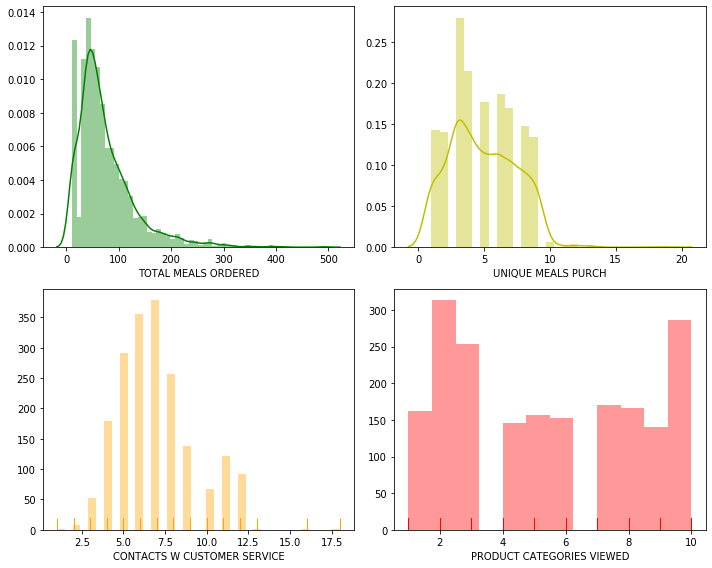

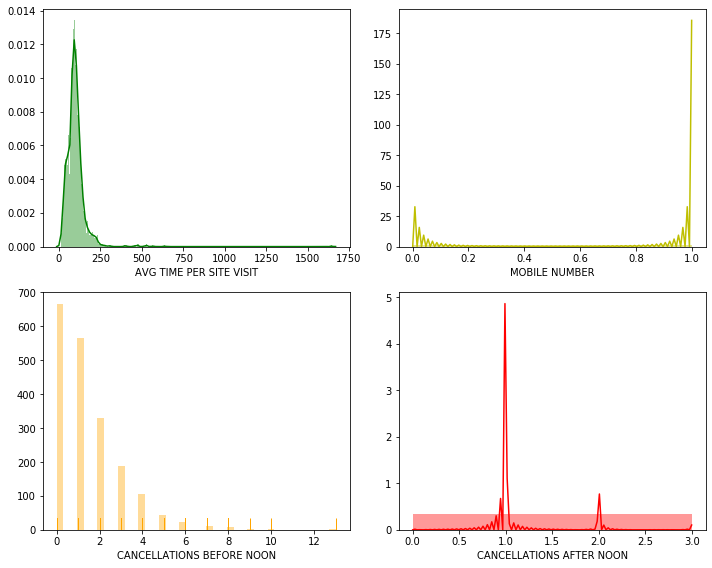

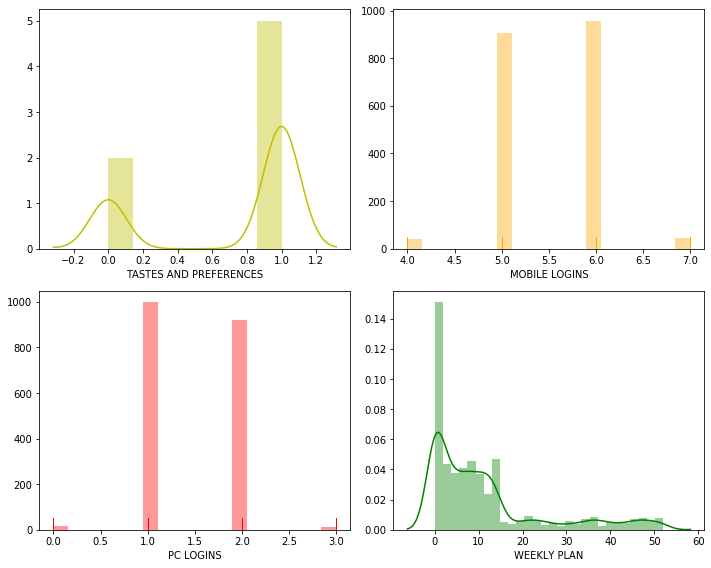

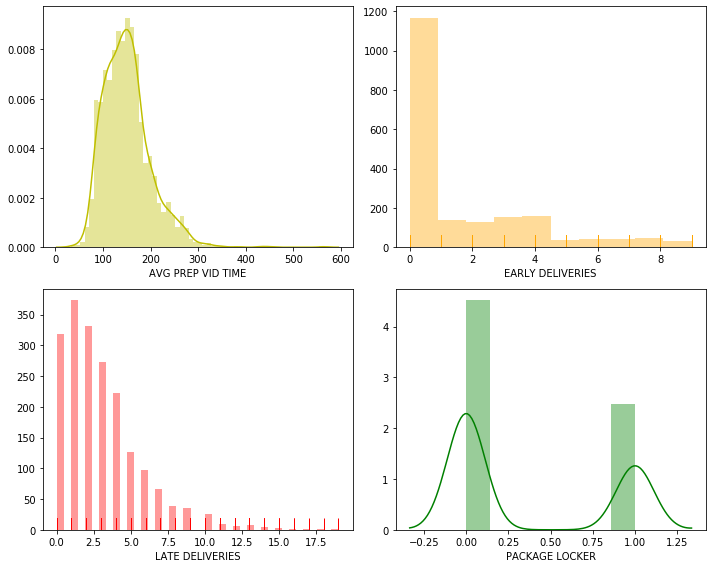

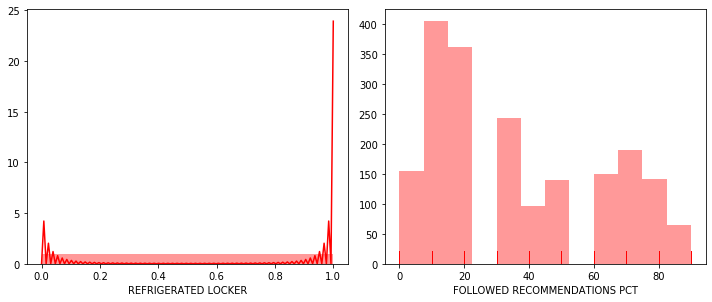

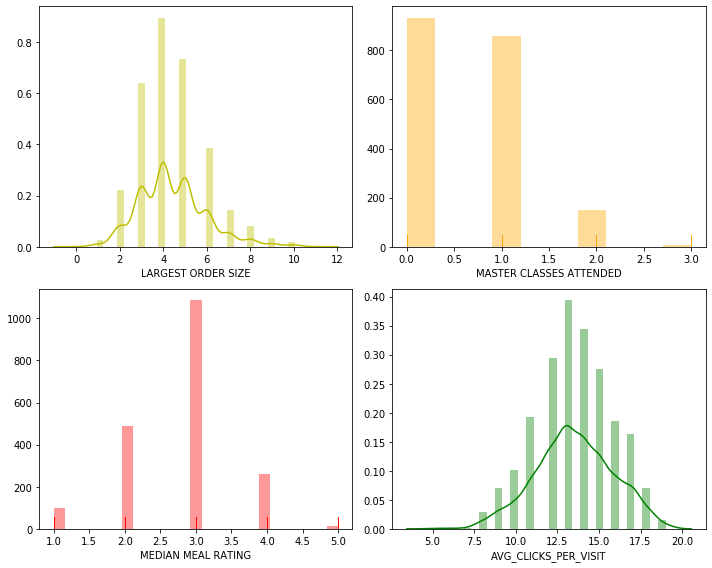

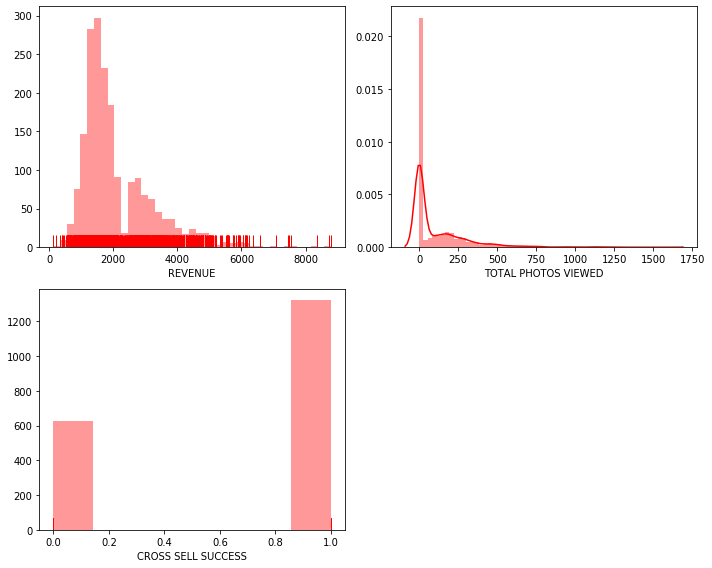

In [15]:
# OUTLIER ANALYSIS 

##########################
# Visual EDA (Histograms)#
#########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL MEALS ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE MEALS PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CONTACTS W CUSTOMER SERVICE')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PRODUCT CATEGORIES VIEWED')
plt.tight_layout()
plt.savefig('Chef Data Histograms 1 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG TIME PER SITE VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE NUMBER')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS BEFORE NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('CANCELLATIONS AFTER NOON')
plt.tight_layout()
plt.savefig('Chef Data Histograms 2 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TASTES AND PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE LOGINS')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PC LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY PLAN')
plt.tight_layout()
plt.savefig('Chef Data Histograms 3 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG PREP VID TIME')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE LOCKER')
plt.tight_layout()
plt.savefig('Chef Data Histograms 4 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('REFRIGERATED LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED RECOMMENDATIONS PCT')
plt.tight_layout()
plt.savefig('Chef Data Histograms 5 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('LARGEST ORDER SIZE')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('MASTER CLASSES ATTENDED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('MEDIAN MEAL RATING')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')
plt.tight_layout()
plt.savefig('Chef Data Histograms 6 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('TOTAL PHOTOS VIEWED')

########################
plt.subplot(2, 2, 3)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CROSS SELL SUCCESS')
plt.tight_layout()
plt.savefig('Chef Data Histograms 7 of 7.png')
plt.show()


In [16]:
# setting outlier thresholds
TOTAL_MEALS_ORDERED_hi = 300
UNIQUE_MEALS_PURCH_hi = 10
CONTACTS_W_CUSTOMER_SERVICE_lo = 2
CONTACTS_W_CUSTOMER_SERVICE_hi = 12.5
AVG_TIME_PER_SITE_VISIT_hi = 500
CANCELLATIONS_BEFORE_NOON_hi = 8
CANCELLATIONS_AFTER_NOON_hi = 2
MOBILE_LOGINS_hi = 7
MOBILE_LOGINS_lo = 4
PC_LOGINS_hi = 3
LATE_DELIVERIES_hi = 11
LARGEST_ORDER_SIZE_hi = 10
MEDIAN_MEAL_RATING_hi = 4
TOTAL_PHOTOS_VIEWED_hi = 500
AVG_CLICKS_PER_VISIT_hi = 18
AVG_CLICKS_PER_VISIT_lo = 7.5
REVENUE_hi = 6000
AVG_PREP_VID_TIME_hi = 350

In [17]:
##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# UNIQUE_MEALS_PURCH
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]


original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# PC_LOGINS
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_hi]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# LARGEST_ORDER_SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# MEDIAN_MEAL_RATING
original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)
original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# REVENUE
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_hi]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


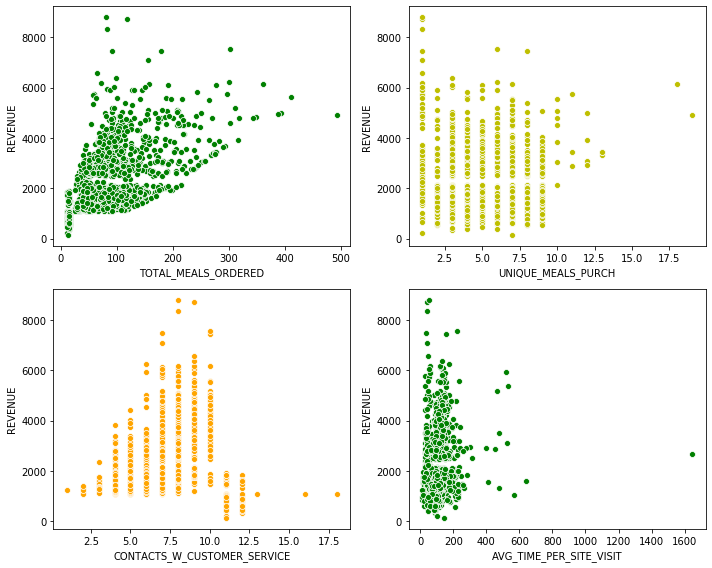

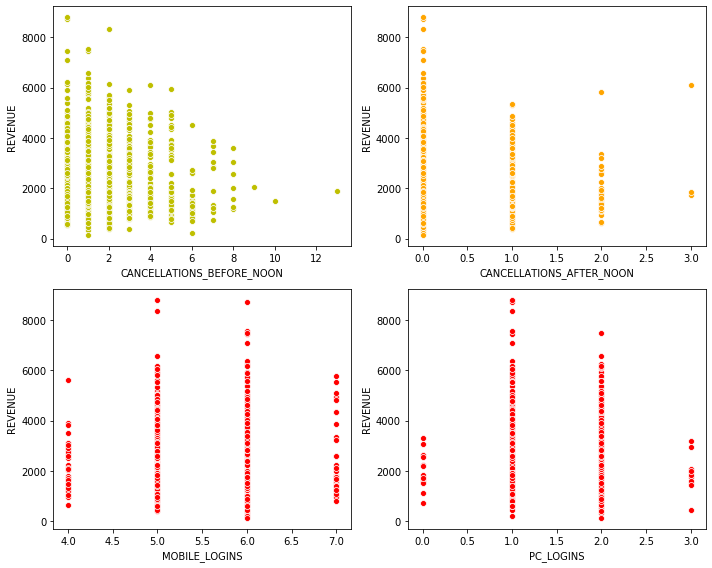

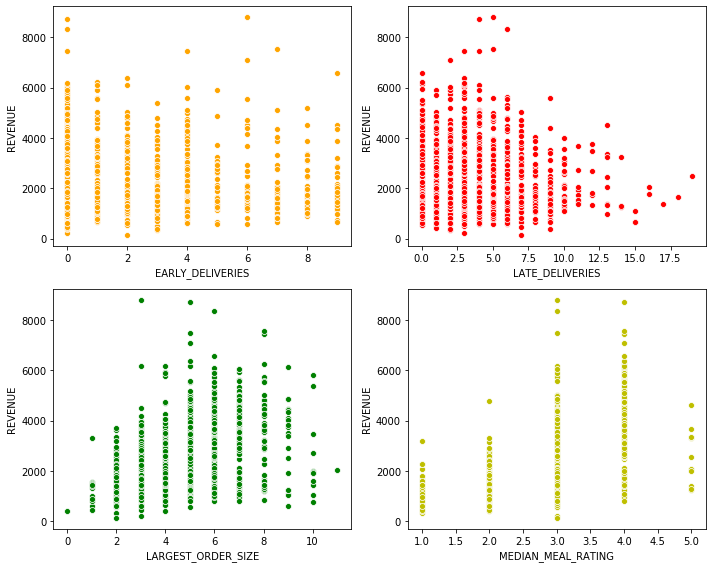

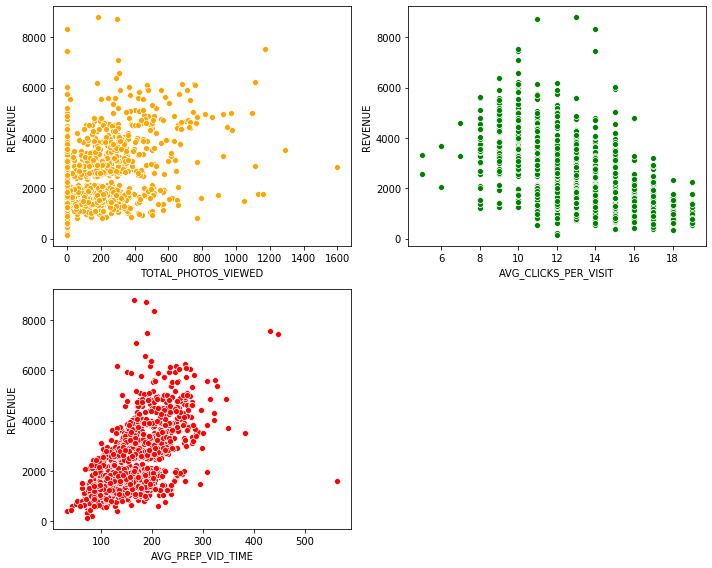

In [18]:
# DEVELOPING TREND-BASED FEATURES

########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
########################
plt.subplot(2, 2, 4)

sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

plt.tight_layout()
plt.savefig('Chef Data Scatterplots 1 of 4.png')
plt.show()

########################
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)

sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################
plt.subplot(2, 2, 2)

sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################
plt.subplot(2, 2, 3)

sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################
########################

plt.subplot(2, 2, 4)           

sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('PC_LOGINS')

plt.tight_layout()
plt.savefig('Chef Data Scatterplots 2 of 4.png')
plt.show()

########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)

sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################
plt.subplot(2, 2, 2)

sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################
plt.subplot(2, 2, 3)

sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()

########################
########################
plt.subplot(2, 2, 4)

sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.savefig('Chef Data Scatterplots 3 of 4.png')
plt.show()

########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)

sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
########################
plt.subplot(2, 2, 2)

sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')
########################

plt.subplot(2, 2, 3)           

sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

plt.tight_layout()
plt.savefig('Chef Data Scatterplots 4 of 4.png')
plt.show()
########################

In [19]:
# setting trend-based thresholds
AVG_TIME_PER_SITE_VISIT_change_hi = 300 # data scatters below this point
LATE_DELIVERIES_change_hi = 13 #trend changes above this point
AVG_PREP_VID_TIME_change_hi = 300 # data scatters below this point
AVG_CLICKS_PER_VISIT_change_lo = 8 # data scatters before this point
TOTAL_PHOTOS_VIEWED_change_at = 0 # zero inflated


In [20]:
##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for outliers

########################################
## change above threshold             ##
########################################

# greater/smaller than sign


# AVG_TIME_PER_SITE_VISIT
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_change_hi]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES
original_df['change_LATE_DELIVERIES'] = 0
condition = original_df.loc[0:,'change_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_change_hi]

original_df['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)

# AVG_PREP_VID_TIME
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_change_hi]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                value      = 1,
                                inplace    = True)


# AVG_CLICKS_PER_VISIT
original_df['change_AVG_CLICKS_PER_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_change_lo]

original_df['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


########################################
## change at threshold                ##
########################################

# double-equals sign


# TOTAL_PHOTOS_VIEWED
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_change_at]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)





In [21]:
#################################################
# making a copy of chef_dataset
original_df_explanatory = original_df.copy()


# dropping Revenue and categorical values from the explanatory variable set
original_df_explanatory = original_df_explanatory.drop(['EMAIL','REVENUE', 'NAME', 'FIRST_NAME','FAMILY_NAME'], axis = 1) 


# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")


original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['EMAIL_domain'] +
original_df['domain_group'] +
original_df['m_FAMILY_NAME'] +
original_df['out_TOTAL_

In [22]:
# saving feature-rich dataset in Excel
original_df.to_excel('original_df_feature_rich.xlsx',
                 index = False)

#################################################

# making a copy of chef_dataset
original_df_explanatory = original_df.copy()


# dropping Revenue and categorical values from the explanatory variable set
original_df_explanatory = original_df.drop(['EMAIL','REVENUE', 'NAME', 'FIRST_NAME','FAMILY_NAME'], axis=1)


# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['EMAIL_domain'] +
original_df['domain_group'] +
original_df['m_FAMILY_NAME'] +
original_df['out_TOTAL_

In [23]:
# creating a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)


# printing (Pearson) correlations with REVENUE
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
AVG_PREP_VID_TIME                  0.64
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
TOTAL_PHOTOS_VIEWED                0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
out_REVENUE                        0.40
out_TOTAL_PHOTOS_VIEWED            0.29
out_TOTAL_MEALS_ORDERED            0.23
change_AVG_PREP_VID_TIME           0.19
AVG_TIME_PER_SITE_VISIT            0.14
out_UNIQUE_MEALS_PURCH             0.13
out_AVG_PREP_VID_TIME              0.12
CONTACTS_W_CUSTOMER_SERVICE        0.10
change_AVG_TIME_PER_SITE_VISIT     0.07
out_AVG_TIME_PER_SITE_VISIT        0.06
change_AVG_CLICKS_PER_VISIT        0.06
out_MEDIAN_MEAL_RATING             0.04
out_CANCELLATIONS_AFTER_NOON       0.04
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
MOBILE_LOGINS                      0.02
CANCELLATIONS_BEFORE_NOON          0.01
WEEKLY_PLAN                        0.01


In [25]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """ original_df['REVENUE'] ~ original_df['TOTAL_MEALS_ORDERED']+
                                original_df['UNIQUE_MEALS_PURCH']+
                                original_df['CONTACTS_W_CUSTOMER_SERVICE']+
                                original_df['AVG_TIME_PER_SITE_VISIT']+
                                original_df['AVG_PREP_VID_TIME']+
                                original_df['LARGEST_ORDER_SIZE']+
                                original_df['MASTER_CLASSES_ATTENDED']+
                                original_df['MEDIAN_MEAL_RATING']+
                                original_df['AVG_CLICKS_PER_VISIT']+
                                original_df['TOTAL_PHOTOS_VIEWED']+
                                original_df['out_TOTAL_MEALS_ORDERED']+
                                original_df['out_LARGEST_ORDER_SIZE']+
                                original_df['out_MEDIAN_MEAL_RATING']+
                                original_df['out_AVG_CLICKS_PER_VISIT']+
                                original_df['out_REVENUE']+
                                original_df['out_AVG_PREP_VID_TIME']+
                                original_df['change_AVG_TIME_PER_SITE_VISIT']  """,
                                data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     original_df['REVENUE']   R-squared:                       0.709
Model:                                OLS   Adj. R-squared:                  0.706
Method:                     Least Squares   F-statistic:                     276.4
Date:                    Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                            22:30:22   Log-Likelihood:                -15254.
No. Observations:                    1946   AIC:                         3.054e+04
Df Residuals:                        1928   BIC:                         3.064e+04
Df Model:                              17                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -39.9426    263.468     -0.152      0.880    -556.655     476.769
original_df['TOTAL_MEALS_ORDERED']                5.5068      0.342     16.106      0.000       4.836       6.177
original_df['UNIQUE_MEALS_PURCH']               -54.5988      5.750     -9.495      0.000     -65.876     -43.322
original_df['CONTACTS_W_CUSTOMER_SERVICE']       40.0843      6.299      6.364      0.000      27.731      52.438
original_df['AVG_TIME_PER_SITE_VISIT']           -0.7547      0.300     -2.514      0.012      -1.344      -0.166
original_df['AVG_PREP_VID_TIME']                  9.3169      0.595     15.651      0.000       8.149      10.484
original_df['LARGEST_ORDER_SIZE']               -90.5979     15.656     -5.787      0.000    -121.303     -59.893
original_df['MASTER_CLASSES_ATTENDED']          149.0736     25.627      5.817      0.000      98.814     199.333
original_df['MEDIAN_MEAL_RATING']               348.0436     38.400      9.064      0.000     272.734     423.353
original_df['AVG_CLICKS_PER_VISIT']             -25.3663     11.757     -2.157      0.031     -48.425      -2.308
original_df['TOTAL_PHOTOS_VIEWED']                0.5613      0.090      6.254      0.000       0.385       0.737
original_df['out_TOTAL_MEALS_ORDERED']         -616.8763    195.081     -3.162      0.002    -999.467    -234.285
original_df['out_LARGEST_ORDER_SIZE']         -1385.6640    623.002     -2.224      0.026   -2607.493    -163.835
original_df['out_MEDIAN_MEAL_RATING']         -1200.2940    194.522     -6.170      0.000   -1581.789    -818.799
original_df['out_AVG_CLICKS_PER_VISIT']         353.6827    152.635      2.317      0.021      54.335     653.030
original_df['out_REVENUE']                     3247.9059    159.579     20.353      0.000    2934.941    3560.870
original_df['out_AVG_PREP_VID_TIME']          -2326.9517    348.366     -6.680      0.000   -3010.166   -1643.737
original_df['change_AVG_TIME_PER_SITE_VISIT']   586.0229    216.232      2.710      0.007     161.950    1010.096
==============================================================================
Omnibus:                      216.144   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.351
Skew:                           0.638   Prob(JB):                    1.38e-114
Kurtosis:                       5.200   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate tha

In [26]:
# specifying file name
file = 'original_df_feature_rich.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

# checking the file
original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,out_MEDIAN_MEAL_RATING,out_TOTAL_PHOTOS_VIEWED,out_AVG_CLICKS_PER_VISIT,out_REVENUE,out_AVG_PREP_VID_TIME,change_AVG_TIME_PER_SITE_VISIT,change_LATE_DELIVERIES,change_AVG_PREP_VID_TIME,change_AVG_CLICKS_PER_VISIT,change_TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,0,0,0,0,0,0,0,0,0,1
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,0,0,0,0,0,0,0,0,0,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,0,0,0,0,0,0,1
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,0,0,0,0,0,0,0,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# preparing explanatory variable data
original_df_data = original_df.drop([ 'REVENUE',
                                        'EMAIL',
                                        'NAME', 
                                        'FIRST_NAME',
                                        'FAMILY_NAME'],
                                         axis = 1)


# preparing response variable data
original_df_target = original_df.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 47)
(1459,)
(487, 47)
(487,)


In [28]:
# declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'AVG_TIME_PER_SITE_VISIT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED',
'out_TOTAL_MEALS_ORDERED',
'out_LARGEST_ORDER_SIZE',
'out_MEDIAN_MEAL_RATING',
'out_AVG_CLICKS_PER_VISIT',
'out_REVENUE',
'out_AVG_PREP_VID_TIME',
'change_AVG_TIME_PER_SITE_VISIT']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"original_df_train['{val}'] +")

original_df_train['TOTAL_MEALS_ORDERED'] +
original_df_train['UNIQUE_MEALS_PURCH'] +
original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_train['AVG_TIME_PER_SITE_VISIT'] +
original_df_train['AVG_PREP_VID_TIME'] +
original_df_train['LARGEST_ORDER_SIZE'] +
original_df_train['MASTER_CLASSES_ATTENDED'] +
original_df_train['MEDIAN_MEAL_RATING'] +
original_df_train['AVG_CLICKS_PER_VISIT'] +
original_df_train['TOTAL_PHOTOS_VIEWED'] +
original_df_train['out_TOTAL_MEALS_ORDERED'] +
original_df_train['out_LARGEST_ORDER_SIZE'] +
original_df_train['out_MEDIAN_MEAL_RATING'] +
original_df_train['out_AVG_CLICKS_PER_VISIT'] +
original_df_train['out_REVENUE'] +
original_df_train['out_AVG_PREP_VID_TIME'] +
original_df_train['change_AVG_TIME_PER_SITE_VISIT'] +


In [30]:
# merging X_train and y_train so that they can be used in statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~ original_df_train['TOTAL_MEALS_ORDERED'] +
                                original_df_train['UNIQUE_MEALS_PURCH'] +
                                original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                original_df_train['AVG_TIME_PER_SITE_VISIT'] +
                                original_df_train['AVG_PREP_VID_TIME'] +
                                original_df_train['LARGEST_ORDER_SIZE'] +
                                original_df_train['MASTER_CLASSES_ATTENDED'] +
                                original_df_train['MEDIAN_MEAL_RATING'] +
                                original_df_train['AVG_CLICKS_PER_VISIT'] +
                                original_df_train['TOTAL_PHOTOS_VIEWED'] +
                                original_df_train['out_TOTAL_MEALS_ORDERED'] +
                                original_df_train['out_LARGEST_ORDER_SIZE'] +
                                original_df_train['out_MEDIAN_MEAL_RATING'] +
                                original_df_train['out_AVG_CLICKS_PER_VISIT'] +
                                original_df_train['out_REVENUE'] +
                                original_df_train['out_AVG_PREP_VID_TIME'] +
                                original_df_train['change_AVG_TIME_PER_SITE_VISIT'] """,
                                data = original_df_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     222.2
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:31:20   Log-Likelihood:                -11414.
No. Observations:                1459   AIC:                         2.286e+04
Df Residuals:                    1442   BIC:                         2.295e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [31]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
original_df_data   = original_df.loc[ : , x_variables]


# Preparing the target variable
original_df_target = original_df.loc[:, 'REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
# INSTANTIATING a model object
gbt = GradientBoostingRegressor()


# FITTING to the training data
gbt_fit = gbt.fit(X_train,y_train)


# PREDICTING on new data
gbt_pred = gbt.predict(X_test)


# SCORING the results
print('Training Score:', gbt.score(X_train, y_train).round(4))
print('Testing Score:',  gbt.score(X_test, y_test).round(4))


# saving scoring data for future use
gbt_train_score = gbt.score(X_train, y_train).round(4)
gbt_test_score  = gbt.score(X_test, y_test).round(4)

Training Score: 0.9086
Testing Score: 0.8248
